In [24]:
import pandas as pd
df = pd.read_csv('smoking.csv')
df = df[:10000]

In [25]:
df = df.drop(['ID','height(cm)','oral'], axis=1)
df['tartar'] = df['tartar'].apply(lambda x: 1 if x == 'Y' else 0)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [26]:
variabili_pca = list(df.columns[:-1])
print(variabili_pca)

['gender', 'age', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar']


In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variabili_pca])
scaled_data # nuovo dataset con standardizzate le colonne

array([[-1.30824185, -0.3498111 , -0.4533991 , ..., -0.25219847,
        -0.5252006 ,  0.89833802],
       [-1.30824185, -0.3498111 , -0.4533991 , ..., -0.42709473,
        -0.5252006 ,  0.89833802],
       [ 0.76438466,  0.89300428, -0.4533991 , ..., -0.34936306,
        -0.5252006 , -1.11316673],
       ...,
       [ 0.76438466,  1.30727608, -0.06260518, ..., -0.21333263,
        -0.5252006 ,  0.89833802],
       [ 0.76438466, -0.7640829 , -0.4533991 , ..., -0.40766182,
        -0.5252006 ,  0.89833802],
       [ 0.76438466, -0.7640829 ,  1.89136437, ..., -0.23276555,
        -0.5252006 ,  0.89833802]])

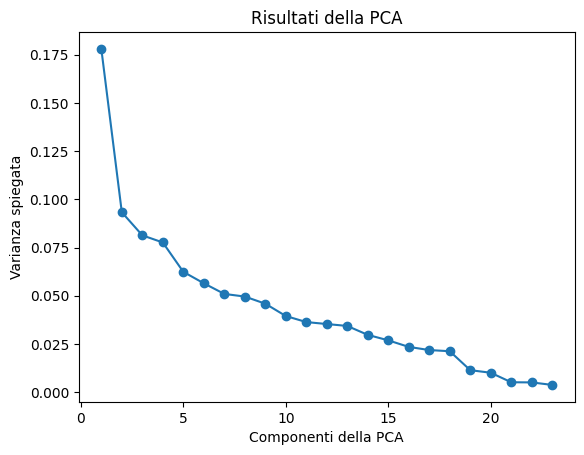

In [28]:
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [29]:
# Applica la PCA per ridurre la dimensionalità dei dati
pca = PCA(n_components=15).fit(scaled_data)
pca_data = pca.transform(scaled_data)
# Quantifichiamo la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.1779699  0.09329927 0.08133556 0.07763173 0.06241215 0.05647984
 0.05095945 0.04959773 0.04589814 0.03951102 0.03636944 0.03535539
 0.03435581 0.02973754 0.02689337]


In [30]:
sum = 0
for data in pca.explained_variance_ratio_:
    sum += data
print(sum)

0.8978063212201665


In [31]:
pca_df = pd.DataFrame(abs(pca.components_[:15]), columns=df.columns[:-1],
                     index=['PC1','PC2','PC3','PC4','PC5',
                            'PC6','PC7','PC8','PC9','PC10','PCA11','PCA12','PCA13','PCA14','PCA15'])
pca_df

gender       age  weight(kg)  waist(cm)  eyesight(left)  \
PC1    0.366260  0.110620    0.400539   0.371181        0.073116   
PC2    0.217294  0.437956    0.136449   0.040644        0.300940   
PC3    0.051789  0.001124    0.034645   0.043763        0.014510   
PC4    0.078511  0.151881    0.077591   0.113247        0.077919   
PC5    0.133535  0.054383    0.017948   0.031294        0.021170   
PC6    0.016080  0.090532    0.049488   0.105975        0.450027   
PC7    0.025566  0.130499    0.009352   0.033660        0.231096   
PC8    0.251114  0.078070    0.000114   0.095066        0.281855   
PC9    0.051241  0.081630    0.160916   0.167662        0.093545   
PC10   0.206427  0.040159    0.223518   0.263650        0.002726   
PCA11  0.040744  0.373557    0.224127   0.172456        0.203476   
PCA12  0.008338  0.195737    0.027487   0.013526        0.123208   
PCA13  0.064085  0.000134    0.330819   0.393494        0.009570   
PCA14  0.078433  0.431894    0.156988   0.334663        0.223647   
PCA15  0.124299  0.293614    0.020794   0.055910        0.569692   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
PC1           0.067477       0.006519        0.011586  0.217621    0.230033   
PC2           0.254098       0.260309        0.249443  0.277437    0.238034   
PC3           0.007618       0.146769        0.132298  0.086575    0.116050   
PC4           0.076751       0.213192        0.249231  0.262622    0.214570   
PC5           0.017359       0.464194        0.472970  0.408641    0.437299   
PC6           0.486464       0.317167        0.309161  0.271204    0.273910   
PC7           0.187851       0.097976        0.103217  0.092657    0.099674   
PC8           0.397814       0.014553        0.010891  0.098879    0.100858   
PC9           0.039733       0.044088        0.011806  0.066094    0.062987   
PC10          0.044130       0.025477        0.049448  0.053438    0.035274   
PCA11         0.002087       0.150784        0.082386  0.115256    0.093579   
PCA12         0.033785       0.070406        0.086824  0.014516    0.025708   
PCA13         0.008991       0.008445        0.021718  0.081813    0.132515   
PCA14         0.085574       0.110317        0.018156  0.039136    0.123787   
PCA15         0.650518       0.183763        0.026901  0.015055    0.050202   

       ...       HDL       LDL  hemoglobin  Urine protein  serum creatinine  \
PC1    ...  0.230236  0.043820    0.347067       0.042375          0.237657   
PC2    ...  0.025295  0.131649    0.152138       0.066037          0.162115   
PC3    ...  0.054391  0.583652    0.037951       0.030103          0.002123   
PC4    ...  0.148789  0.248920    0.017230       0.008996          0.053523   
PC5    ...  0.192139  0.220046    0.106798       0.012524          0.224388   
PC6    ...  0.290943  0.049162    0.002229       0.012102          0.001637   
PC7    ...  0.126631  0.011091    0.038716       0.161077          0.065171   
PC8    ...  0.306399  0.053826    0.247722       0.107663          0.360644   
PC9    ...  0.207781  0.051923    0.030805       0.751054          0.250391   
PC10   ...  0.309429  0.105621    0.253224       0.569341          0.098265   
PCA11  ...  0.280034  0.085548    0.008103       0.135728          0.391525   
PCA12  ...  0.078182  0.123588    0.045691       0.099311          0.198780   
PCA13  ...  0.360995  0.039287    0.086365       0.042674          0.094171   
PCA14  ...  0.168974  0.078711    0.298404       0.148116          0.292501   
PCA15  ...  0.080045  0.080951    0.116012       0.042478          0.058368   

            AST       ALT       Gtp  dental caries    tartar  
PC1    0.157827  0.208873  0.217083       0.062957  0.063812  
PC2    0.255468  0.204504  0.187376       0.086112  0.069152  
PC3    0.331610  0.296754  0.128815       0.001036  0.026415  
PC4    0.498954  0.491844  0.200794       0.018141  0.046209  
PC5    0.003197  0.008916  0.089419       0.004307  0.019736  
PC6    0.079

In [32]:
# crea un nuovo dataframe con le componenti principali
df_pca = pd.DataFrame(data = pca_data,
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PCA11','PCA12','PCA13','PCA14','PCA15'])

# aggiungi la colonna target al nuovo dataframe
df_pca['target'] = df['smoking']

# Finita PCA, inizio Decision Tree

In [34]:
from sklearn.model_selection import train_test_split

X = df_pca.drop('target', axis=1)
y = df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Visualizza l'albero decisionale
fig, ax = plt.subplots(figsize=(150, 100))
plot_tree(model, filled=True, ax=ax)
plt.plot()

[]

In [36]:
from sklearn.metrics import confusion_matrix

# predizione del nuovo modello
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)
print("\nAccuracy:", cm.diagonal().sum() / cm.sum())

Confusion matrix:
 [[1434  507]
 [ 512  547]]

Accuracy: 0.6603333333333333


In [37]:
path = model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas

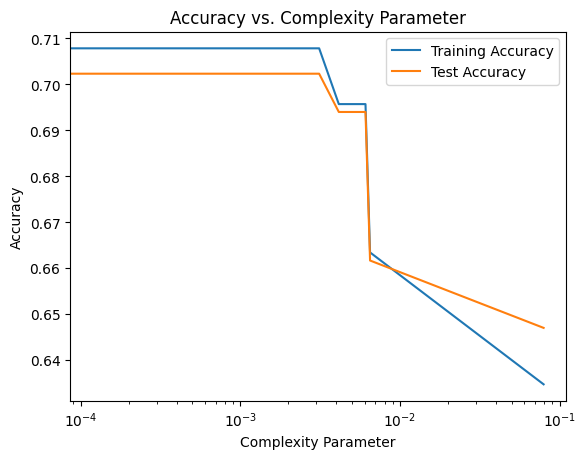

In [38]:
# valori di complessità candidati ad essere tagliati dal modello
# complexity_values = [0.001, 0.01, 0.1, 1, 10, 100]
ccp_alphas = path.ccp_alphas

# Addestra l'albero decisionale con diversi valori di complessità
train_accuracy = []
test_accuracy = []
for complexity in ccp_alphas:
    clf = DecisionTreeClassifier(max_depth=3, ccp_alpha=complexity)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Plotta l'accuratezza del modello in funzione del parametro di complessità
plt.plot(ccp_alphas, train_accuracy, label='Training Accuracy')
plt.plot(ccp_alphas, test_accuracy, label='Test Accuracy')
plt.xlabel('Complexity Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Complexity Parameter')
plt.xscale('log')
plt.legend()
plt.show()

In [39]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07930505944493066


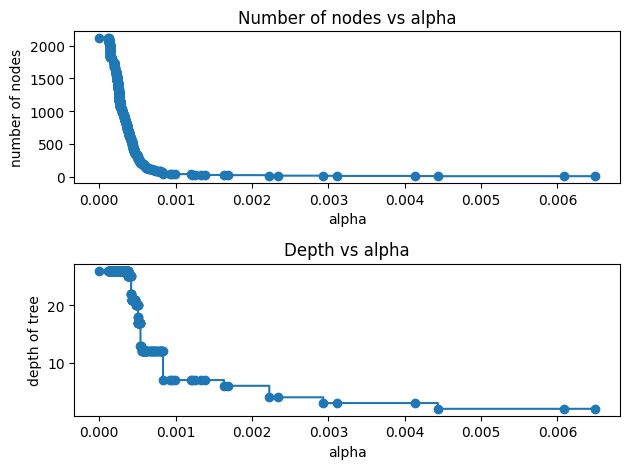

In [40]:
clfs = clfs[:-1]
complexity_values = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(complexity_values, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(complexity_values, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [43]:
# Potiamo albero con alpha=0.001
clf_pruned = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.001)
clf_pruned.fit(X_train, y_train)

accuracy_pruned = clf_pruned.score(X_test, y_test)
print(accuracy_pruned)

0.7023333333333334


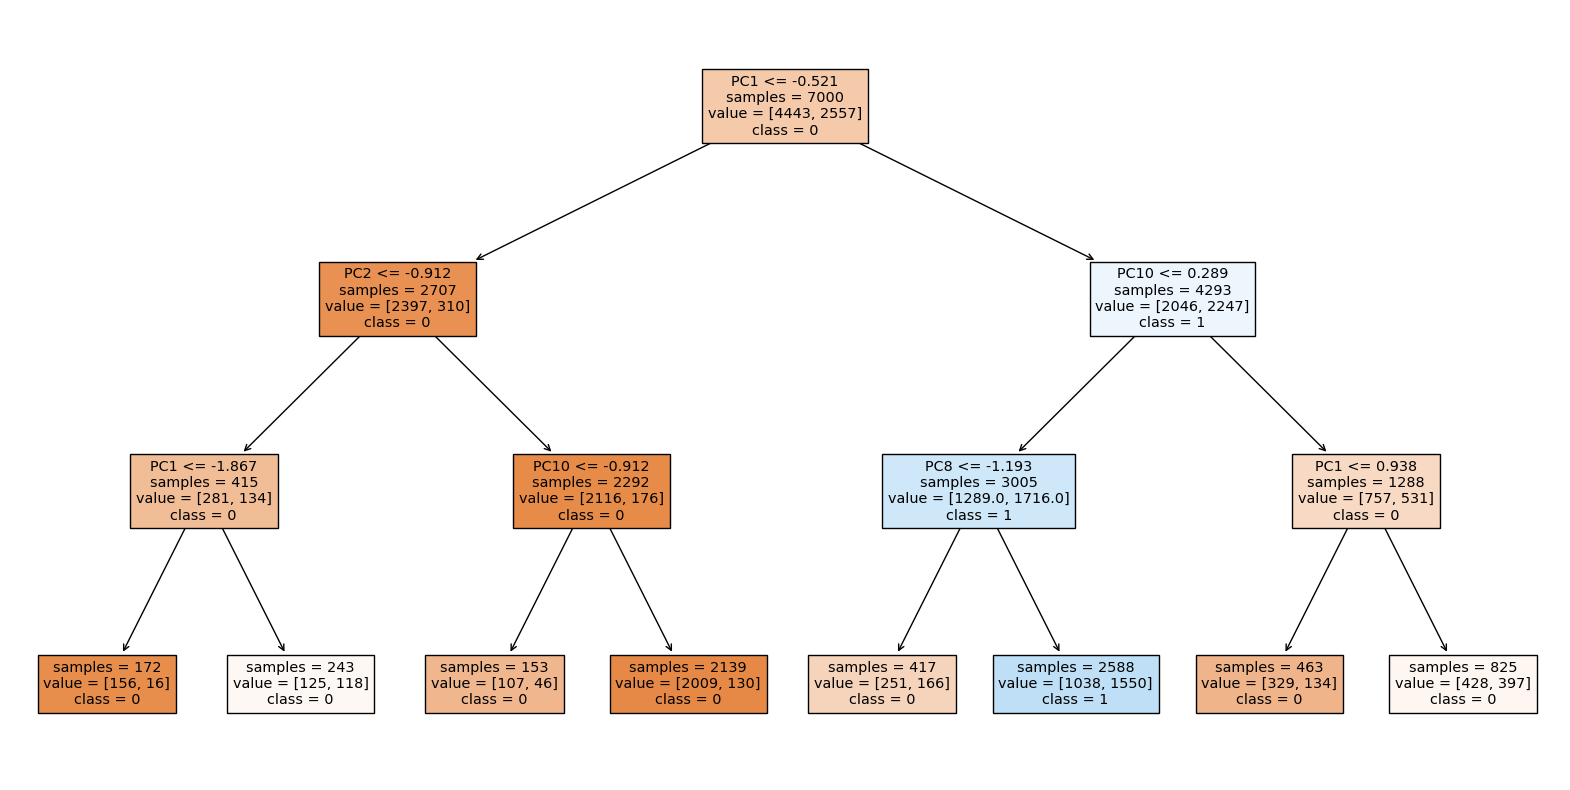

Confusion matrix:
 [[1476  465]
 [ 428  631]]

Accuracy: 0.7023333333333334


In [44]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf_pruned,
          feature_names=X_train.columns,
          class_names=[str(x) for x in clf_pruned.classes_],
          filled=True,
          ax=ax,
          impurity=False)

plt.show()
from sklearn.metrics import confusion_matrix

y_pred = clf_pruned.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)
print("\nAccuracy:", cm.diagonal().sum() / cm.sum())